# Correlating cell shapes & plotting heatmaps of preferred tuning across learning
### Varex per comp is used to filter 

In [406]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
from cascade import utils
from scipy.stats import pearsonr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# set parameters for running GLM
mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

rank_level_sort = 15

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.95)
    sorted_model, sort_order = utils.sortfactors(out[0])
    model_list.append(sorted_model)
    tensor_list.append(out[2][sort_order[rank_level_sort - 1], :, :])
    id_list.append(out[1][sort_order[rank_level_sort - 1]])
    bhv_list.append(out[4])
    meta_list.append(utils.add_stages_to_meta(out[3], 'parsed_11stage'))

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

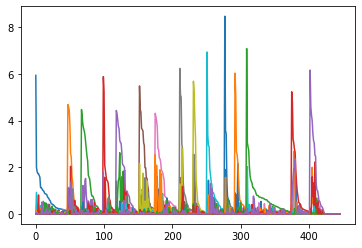

In [14]:
best_cluster = utils.define_high_weight_cell_factors(model_list[0], 15, threshold=1)
cell_factors = model_list[0].results[15][0].factors[0][:, :]
# cell_factors[]
plt.plot(cell_factors)

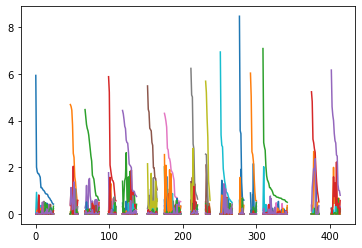

In [16]:
cell_factors[np.isnan(best_cluster), :] = np.nan
plt.plot(cell_factors)

## load variance calcs
- running on beastmode instances now

In [164]:
# checking mice for running on beastmode
mice = cas.lookups.mice['all12'][1:3]
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
print(words)
print(mice)

['horrible', 'horrible']
['AS23', 'AS41']


In [186]:
# component varex

mice = cas.lookups.mice['all12']
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

varex_list = []
for mouse, word in zip(mice, words):
    
    var = cas.calc.var.groupday_varex_bycomp(
        flow.Mouse(mouse),
        trace_type='zscore_day',
        method='ncp_hals',
        cs='',
        warp=False,
        word=word,
        group_by=group_by,
        nan_thresh=0.95,
        score_threshold=0.8,
        rectified=True,
        verbose=False)
    varex_list.append(var)
comp_varex_df = pd.concat(varex_list, axis=0).set_index(['rank', 'component'], append=True)

In [181]:
# all varex

mice = cas.lookups.mice['all12']
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

total_varex_list = []
for mouse, word in zip(mice, words):
    var = cas.calc.var.groupday_varex(
        flow.Mouse(mouse),
        trace_type='zscore_day',
        method='ncp_hals',
        cs='',
        warp=False,
        word=word,
        group_by='all3',
        nan_thresh=0.95,
        score_threshold=0.8,
        rectified=True,
        verbose=False)
    total_varex_list.append(var)
total_varex_df = pd.concat(total_varex_list, axis=0)
total_varex_df_it0 = total_varex_df.loc[total_varex_df.iteration.isin([0])].set_index(['rank'], append=True).drop(columns=['iteration'])
total_varex_df_it0.head()

variance_explained_tcamodel  variance_explained_smoothmodel  \
mouse rank                                                                
AS20  1                        0.076532                        0.782751   
      2                        0.165288                        0.782751   
      3                        0.248928                        0.782751   
      4                        0.276426                        0.782751   
      5                        0.291613                        0.782751   

            variance_explained_meanmodel  variance_explained_meandailymodel  \
mouse rank                                                                    
AS20  1                           0.1107                           0.131112   
      2                           0.1107                           0.131112   
      3                           0.1107                           0.131112   
      4                           0.1107                           0.131112   
      5                           0.1107                           0.131112   

            variance_explained_PCA  
mouse rank                          
AS20  1                   0.464323  
      2                   0.464323  
      3                   0.464323  
      4                   0.464323  
      5                   0.464323

In [199]:
# the value I want --> fraction of variance explained (per comp) out of total variance explained
frac_varex_per_comp = comp_varex_df.variance_explained_tcamodel / total_varex_df_it0.variance_explained_tcamodel
frac_varex_per_comp = frac_varex_per_comp.to_frame().rename(columns={'variance_explained_tcamodel': 'fractional_variance_explained'})
frac_varex_per_comp.head()

fractional_variance_explained
mouse rank component                               
AS20  1    1                               1.001142
      2    1                               0.451758
           2                               0.518110
      3    1                               0.312895
           2                               0.344597

                      fractional_variance_explained
mouse rank component                               
OA26  15   1                               0.051718
           2                               0.041566
           3                               0.045185
           4                               0.101228
           5                               0.088060
           6                               0.123286
           7                               0.025211
           8                               0.111115
           9                               0.111310
           10                              0.111412
           11                              0.131194
           12                              0.083244
           13                              0.048378
           14                              0.049551
           15                              0.022578


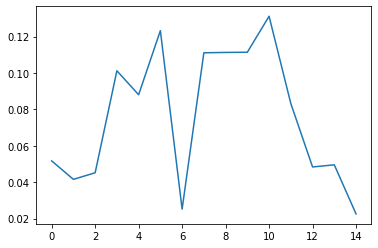

In [200]:
frac_var15 = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([15]).values, :]
print(frac_var15.loc[frac_var15.reset_index()['mouse'].isin(['OA26']).values, :])
plt.plot(frac_var15.loc[frac_var15.reset_index()['mouse'].isin(['OA26']).values, :].values)

- could do distributions of frac varex pooled per rank across mice. 
    - Point being that all of the varex is not coming from one or two components, but is relatively distributed amound components


## how does fractional variance explained (per component) out of total explained variance change as rank increases?

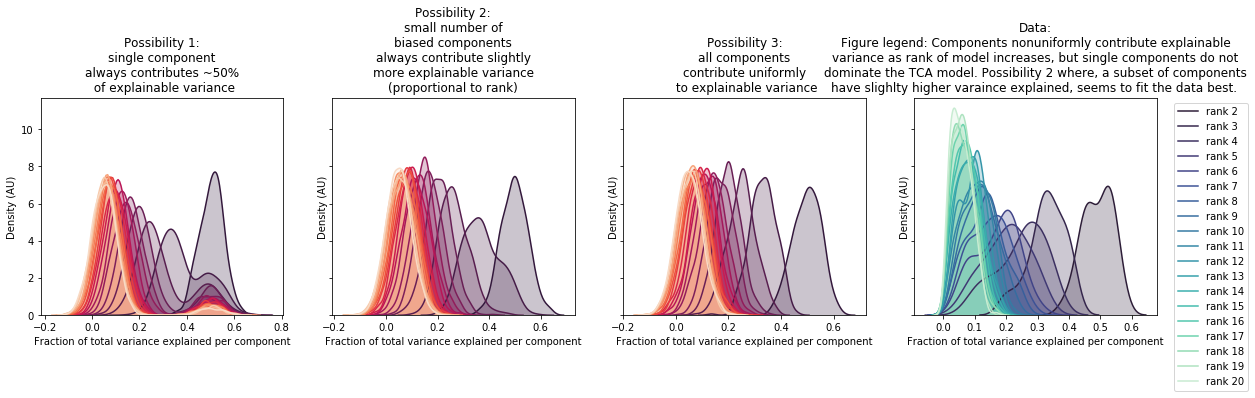

In [613]:
fig, ax = plt.subplots(1,4, figsize=(20,4), sharey=True)
colors = sns.color_palette("mako", 21)
pcolors = sns.color_palette("rocket", 21)

# plot the distribution if a single compoenent always explained a large fraction of the variance 
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    bias50_distributed_result = np.random.normal(1.0/rank, 0.05, len(frac_var_nr)*10)
    if rank > 2:
        bias50_distributed_result[:120] = np.random.normal(1.0/2, 0.05, 120)
    sns.kdeplot(bias50_distributed_result, ax=ax[0], cumulative=False, shade=True, color=pcolors[rank], label=f'rank {rank}', legend=False)
    
# plot the distribution a few components always explained a slightly larger fraction of the variance 
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    bias50_distributed_result = np.random.normal(1.0/rank, 0.05, len(frac_var_nr)*10)
    if rank > 2:
        bias50_distributed_result[:120] = np.random.normal(1.0/rank, 0.05, 120) + np.random.normal(1.0/rank, 0.05, 120)/rank
    sns.kdeplot(bias50_distributed_result, ax=ax[1], cumulative=False, shade=True, color=pcolors[rank], label=f'rank {rank}', legend=False)
    
# plot the result if components shared the variance (distributed in a gaussian manner)
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    distributed_result =np.random.normal(1.0/rank, 0.05, len(frac_var_nr)*10)
    sns.kdeplot(np.array(distributed_result), ax=ax[2], cumulative=False, shade=True, color=pcolors[rank], label=f'rank {rank}', legend=False)
    
# plot the actual distributions of variances explained
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    sns.kdeplot(frac_var_nr.values.flatten(), ax=ax[3], cumulative=False, shade=True, color=colors[rank], label=f'rank {rank}')

# add x and y labels
for axi in ax:
    axi.set_xlabel('Fraction of total variance explained per component')
    axi.set_ylabel('Density (AU)')

# titles and legends
ax[0].set_title('Possibility 1:\nsingle component\nalways contributes ~50%\n of explainable variance')
ax[1].set_title('Possibility 2:\nsmall number of\nbiased components\nalways contribute slightly\nmore explainable variance\n(proportional to rank)')
ax[2].set_title('Possibility 3:\nall components\ncontribute uniformly\n to explainable variance')
ax[3].set_title('Data:\nFigure legend: Components nonuniformly contribute explainable\n' \
               'variance as rank of model increases, but single components do not\n' \
               'dominate the TCA model. Possibility 2 where, a subset of components\n'\
               'have slighlty higher varaince explained, seems to fit the data best. ')
ax[3].legend(bbox_to_anchor=(1.05, 1))

plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/kde_explainable_variance_by_component.png', bbox_inches='tight')
plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/kde_explainable_variance_by_component.pdf', bbox_inches='tight')

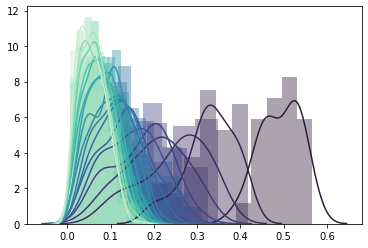

In [349]:
# could plot last panel as distplot to make it clearer that this is real data
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    sns.distplot(frac_var_nr.values.flatten(), kde=True, color=colors[rank], label=f'rank {rank}')

# organize data into matrices with averages taken across stages of learning

In [45]:
# get tuning of each cell first
tuning_list = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='cond')
    tuning_list.append(df)
# cell_tuning = pd.concat(tuning_list, axis=0)

In [46]:
tuning_list[0].head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning    minus-neutral   
      1        L1 reversal1            minus   
      1         L2 learning       plus-minus   
      1        L2 reversal1            broad   
      1         L3 learning            minus   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.22195272423734047, 0.4477677659532566, 0.70...   
      1       [0.13351864981687445, 0.6820032732791814, 0.61...   
      1       [0.49194837333803276, 0.6623026712331795, 0.20...   
      1       [0.41818581075125427, 0.39920909687078043, 0.4...   
      1       [0.06984632071265451, 0.7813822357287312, 0.70...   

                                                  mean response  \
mouse cell_n                                                      
AS20  1       [0.8102384683903909, 0.253379828377761, 0.1496...   
      1       [0.9439842162454425, 0.1955947896692426, 0.367...   
      1       [0.32479159592600865, 0.3200015469668996, 0.84...   
      1       [0.7500456289082826, 0.792864301511142, 0.7584...   
      1       [0.815679012100353, 0.03626748304838481, 0.125...   

              best component  offset component  offset cell  \
mouse cell_n                                                  
AS20  1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   

              component participation  offset participation  
mouse cell_n                                                 
AS20  1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True

In [428]:
# loop over tensor, averaging different periods of time for all cells
norm_please = True
remove_low_cell_weight_cells = True

# manually order learning stages
xorder = ['L0 naive',
          'L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning',
          'L1 reversal1', 'L2 reversal1', 'L3 reversal1', 'L4 reversal1', 'L5 reversal1']

mouse_stage_respones = {}
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):
    
    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    mouse_stage_respones[mouse] = {}
    
    # preallocate
    for s in xorder:
        blank = np.zeros((tensor.shape[0], tensor.shape[1], 4))
        blank[:] = np.nan
        mouse_stage_respones[mouse][s] = blank
    
    # get mean of pmn trials for each stage
    for s in xorder:
        for c, icue in enumerate(['plus', 'minus', 'neutral']):
            meta_bool = meta.parsed_11stage.isin([s]) & meta.condition.isin([icue])  # WHY IS THIS ICOND
            cue_stage_tensor = tensor[:, :, meta_bool]
            cue_stage_mean = np.nanmean(cue_stage_tensor, axis=2)
            mouse_stage_respones[mouse][s][:, :, c] = cue_stage_mean
    
    # normalize to max response for best cue
    if norm_please:
        # norm by max
#         for s in xorder:
#             cue_stage_mean = mouse_stage_respones[mouse][s]
#             max_vec = np.nanmax(np.nanmax(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
#             mouse_stage_respones[mouse][s] = cue_stage_mean/max_vec
        # norm by sub min, div max, rebaseline, (so total amplitude across min and max must be 1)
        for s in xorder:
            cue_stage_mean = mouse_stage_respones[mouse][s]
            min_vec = np.nanmin(np.nanmin(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
            cue_stage_mean = cue_stage_mean - min_vec
            max_vec = np.nanmax(np.nanmax(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
            cue_stage_mean = cue_stage_mean/max_vec
            base_mean_vec = np.nanmean(np.nanmean(cue_stage_mean[:,:15,:], axis=1, keepdims=True), axis=2, keepdims=True)
            mouse_stage_respones[mouse][s] = cue_stage_mean - base_mean_vec
            
    # add in a 4th z slice of preferred tuning responses
    tune_up = tune.reset_index()
    for s in xorder:
        for cell_n in range(tensor.shape[0]):
            pref = tune_up.loc[tune_up.cell_n.isin([cell_n + 1]) & tune_up.parsed_11stage.isin([s]), 'preferred tuning']
            if len(pref) == 1:
                preferred_tuning = pref.item()
                if preferred_tuning == 'broad':
                    # average across cues for broadly tuned cells
                    mean_resp = np.nanmean(mouse_stage_respones[mouse][s][cell_n, :, :], axis=1)
                    mouse_stage_respones[mouse][s][cell_n, :, 3] = mean_resp
                else:
                    # take single preferred tuning or average across joint tuned cells
                    tuning_levels = np.where([s in preferred_tuning for s in ['plus', 'minus', 'neutral']])[0]
                    tuned_response = np.nanmean(mouse_stage_respones[mouse][s][cell_n, :, tuning_levels], axis=0)
                    mouse_stage_respones[mouse][s][cell_n, :, 3] = tuned_response
    
    # remove cells that did not participate in any component
    if remove_low_cell_weight_cells:
        cells_to_keep = ~np.isnan(utils.define_high_weight_cell_factors(model, 15, threshold=1))
        for s in xorder:
            mouse_stage_respones[mouse][s] = mouse_stage_respones[mouse][s][cells_to_keep, :, :]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: All-NaN slice encountered
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: All-NaN slice encountered
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice


In [92]:
print('done')

done


# plot cells sorted by sorted cell factors (or peak response time)
- are cell shapes stable looking across time? 
- this might be good way to rationalize TCA.


In [43]:
tensor_list[0].shape

(447, 108, 5189)

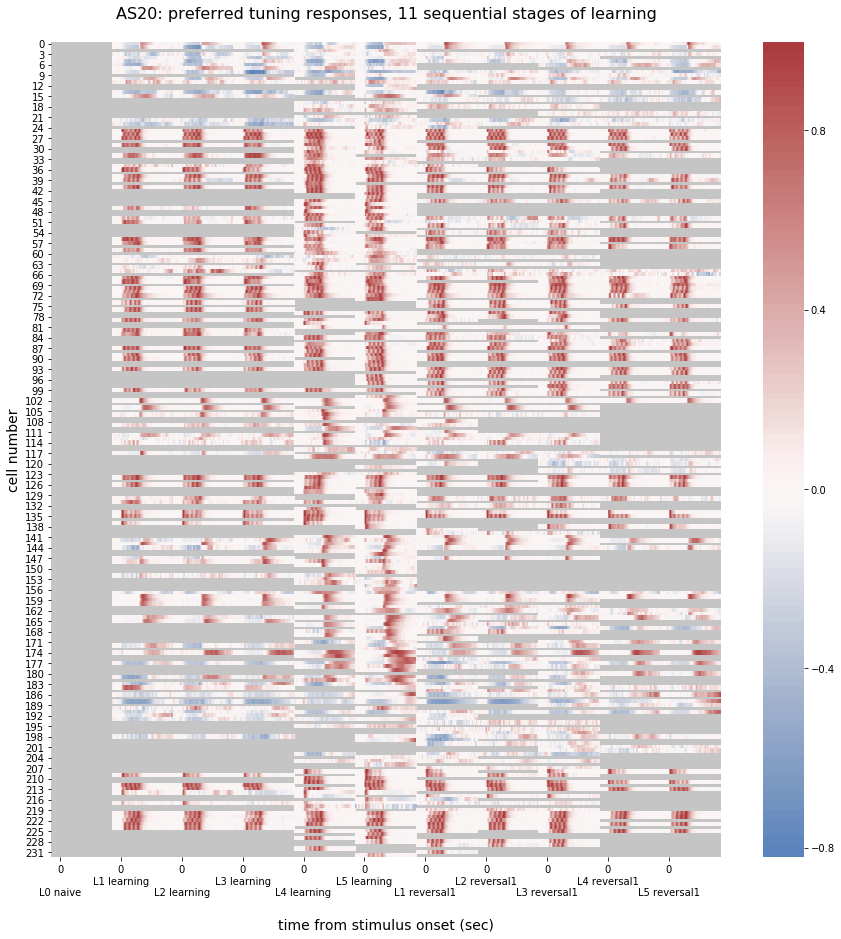

In [677]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = sns.color_palette("vlag", 100)

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = [] 
    for s in xorder:
        stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    g = sns.heatmap(np.hstack(stage_list), center=0, ax=ax, cmap=cmap)
    g.set_facecolor('#c5c5c5')
    ax.set_title(f'{mouse}: preferred tuning responses, 11 sequential stages of learning\n', size=16)
    stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
    stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
    ax.set_xticks(stim_starts)
    ax.set_xticklabels(stim_labels, rotation=0)
    ax.set_ylabel('cell number', size=14)
    ax.set_xlabel('\ntime from stimulus onset (sec)', size=14)
    
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_renorm_{mouse}.png', bbox_inches='tight')
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_renorm_{mouse}.pdf', bbox_inches='tight')
    
    break


## sorted by mean peak response time

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


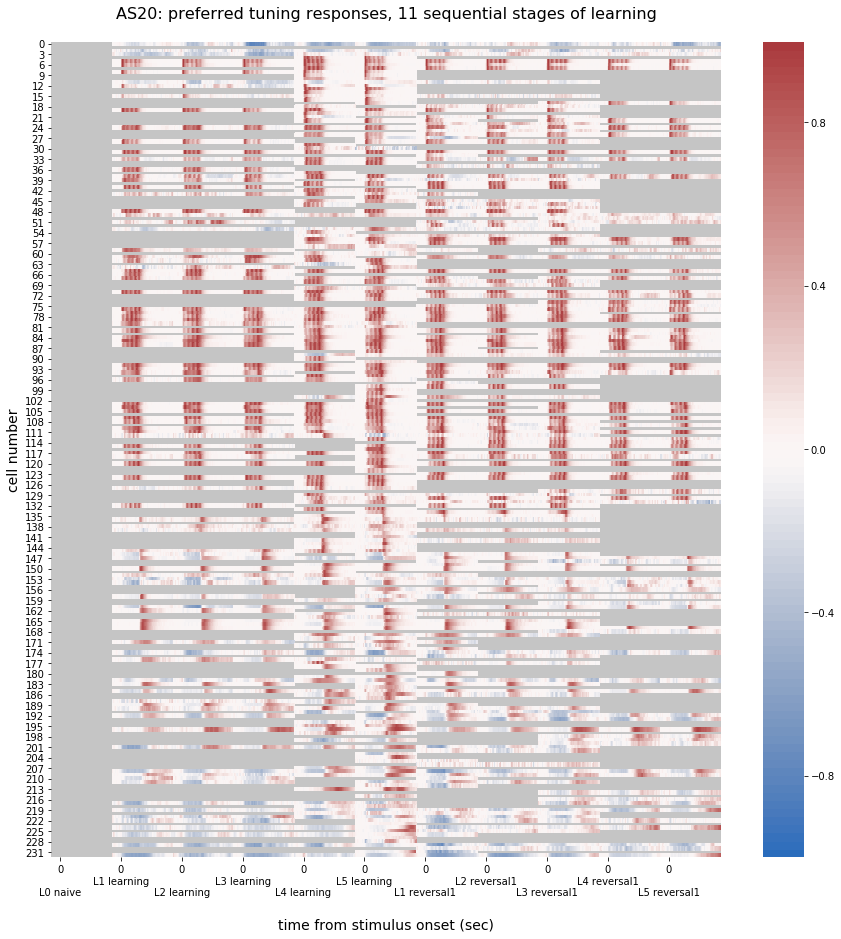

In [610]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = sns.color_palette("vlag", 100)

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = [] 
    for s in xorder:
        stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        
    peak_sort = np.argsort(np.argmax(np.nanmean(np.dstack(stage_list)[:,16:,:], axis=2), axis=1)) # sort post baseline
    
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    g = sns.heatmap(np.hstack(stage_list)[peak_sort, :], vmin=-1, ax=ax, cmap=cmap)
    g.set_facecolor('#c5c5c5')
    ax.set_title(f'{mouse}: preferred tuning responses, 11 sequential stages of learning\n', size=16)
    stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
    stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
    ax.set_xticks(stim_starts)
    ax.set_xticklabels(stim_labels, rotation=0)
    ax.set_ylabel('cell number', size=14)
    ax.set_xlabel('\ntime from stimulus onset (sec)', size=14)
    
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_peaksort_{mouse}.png', bbox_inches='tight')
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_peaksort_{mouse}.pdf', bbox_inches='tight')
    
    break

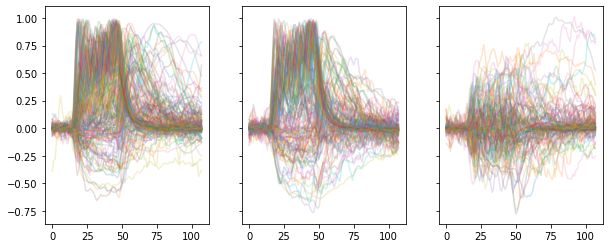

In [609]:
fig, ax = plt.subplots(1, 3, figsize=(10,4), sharex=True, sharey=True)

ax[0].plot(mouse_stage_respones[mouse]['L5 learning'][:,:,3].T, alpha=0.2);
ax[1].plot(mouse_stage_respones[mouse]['L1 reversal1'][:,:,3].T, alpha=0.2);
ax[2].plot(mouse_stage_respones[mouse]['L5 learning'][:,:,3].T -
           mouse_stage_respones[mouse]['L1 reversal1'][:,:,3].T, alpha=0.2);

In [607]:
test = np.hstack(stage_list)
test[np.hstack(stage_list) > 0] = np.nan
pop_inhib = np.nanmean(test, axis=0)
plt.figure(figsize=(12,3))
plt.plot(pop_inhib, label='inhib')

test = np.hstack(stage_list)
test[np.hstack(stage_list) < 0] = np.nan
pop_inhib = np.nanmean(test, axis=0)
# plt.figure(figsize=(12,3))
plt.plot(pop_inhib, label='excite')

ValueError: need at least one array to concatenate

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


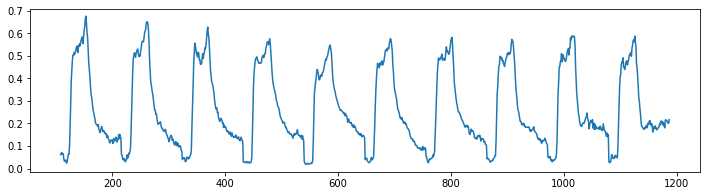

In [394]:
test = np.hstack(stage_list)
test[np.hstack(stage_list) < 0] = np.nan
pop_inhib = np.nanmean(test, axis=0)
plt.figure(figsize=(12,3))
plt.plot(pop_inhib, label='excite')

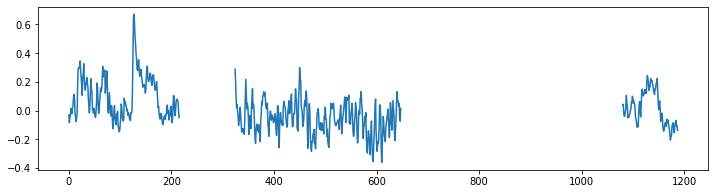

In [432]:
# plot some different cells for comparison
for celli in np.arange(177, 178, 1):
    plt.figure(figsize=(12,3))
    plt.plot(np.hstack(stage_list)[celli, :], label=f'cell {celli}')

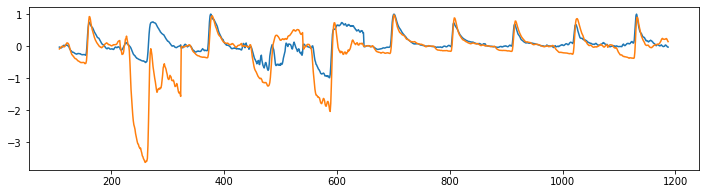

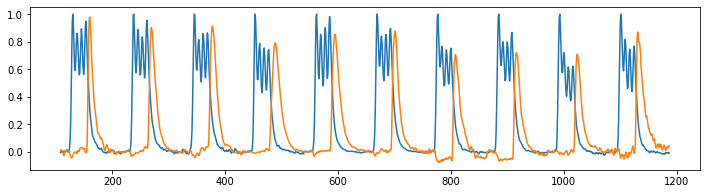

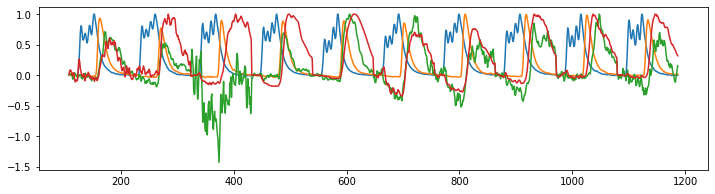

In [387]:
# plot some different cells for comparison
plt.figure(figsize=(12,3))
plt.plot(np.hstack(stage_list)[0, :], label='cell 0')
plt.plot(np.hstack(stage_list)[1, :], label='cell 1')

plt.figure(figsize=(12,3))
plt.plot(np.hstack(stage_list)[87, :], label='cell 87')
plt.plot(np.hstack(stage_list)[102, :], label='cell 102')

plt.figure(figsize=(12,3))
plt.plot(np.hstack(stage_list)[124, :], label='cell 124')
plt.plot(np.hstack(stage_list)[158, :], label='cell 158')
plt.plot(np.hstack(stage_list)[164, :], label='cell 164')
plt.plot(np.hstack(stage_list)[174, :], label='cell 174')

## mean per stage

In [681]:
remove_low_cell_weight_cells = True

mouse_stage_respones_pt = {}
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):
    
    #preallocate
    mouse = meta.reset_index()['mouse'].unique()[0]
    for i in range(4):
        mouse_stage_respones_pt[mouse] = np.zeros((tensor.shape[0], 11, 4))  # hardcoded 11 for parsed_11stage staging
        mouse_stage_respones_pt[mouse][:] = np.nan
    
    # calculate mean by cue
    for c, cue in enumerate(['plus', 'minus', 'neutral']):
        mouse_stage_respones_pt[mouse][:, :, c] = utils.tensor_mean_per_stage_single_pt(
            meta, tensor, initial_cue=False, cue=cue, account_for_offset=False) # TUNING is in terms of condition right now, so don't use initial
    
    # add in a 4th z slice of preferred tuning responses
    tune_up = tune.reset_index()
    for c, s in enumerate(xorder):
        for cell_n in range(tensor.shape[0]):
            pref = tune_up.loc[tune_up.cell_n.isin([cell_n + 1]) & tune_up.parsed_11stage.isin([s]), 'preferred tuning']
            if len(pref) == 1:
                preferred_tuning = pref.item()
                if preferred_tuning == 'broad':
                    # average across cues for broadly tuned cells
                    mean_resp = np.nanmean(mouse_stage_respones_pt[mouse][cell_n, c, :])
                    mouse_stage_respones_pt[mouse][cell_n, c, 3] = mean_resp
                else:
                    # take single preferred tuning or average across joint tuned cells
                    tuning_levels = np.where([s in preferred_tuning for s in ['plus', 'minus', 'neutral']])[0]
                    tuned_response = np.nanmean(mouse_stage_respones_pt[mouse][cell_n, c, tuning_levels])
                    mouse_stage_respones_pt[mouse][cell_n, c, 3] = tuned_response
    
    # remove cells that did not participate in any component
    if remove_low_cell_weight_cells:
        cells_to_keep = ~np.isnan(utils.define_high_weight_cell_factors(model, 15, threshold=1))
        mouse_stage_respones_pt[mouse] = mouse_stage_respones_pt[mouse][cells_to_keep, :, :]
    break

s:\twophoton_analysis\code\cascade\cascade\utils.py:127: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, stage_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:164: RuntimeWarning: Mean of empty slice
  trace_mean = np.nanmean(mtensor, axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:170: RuntimeWarning: Mean of empty slice
  stage_matrix[offset_bool, :] = np.nanmean(mtensor[offset_bool, :, :][:, response_bool, :], axis=1)
s:\twophoton_analysis\code\cascade\cascade\utils.py:171: RuntimeWarning: Mean of empty slice
  stage_matrix[~offset_bool, :] = np.nanmean(mtensor[~offset_bool, :, :][:, stim_bool, :], axis=1)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
s:\twophoton_analysis\code\cascade\cascade\utils.py:1333: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))


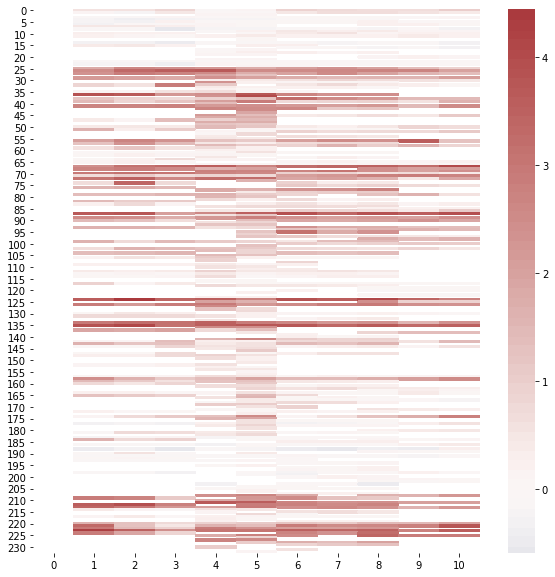

In [687]:
plt.figure(figsize=(10,10))
sns.heatmap(mouse_stage_respones_pt['AS20'][:,:,3], cmap=cmap, center=0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


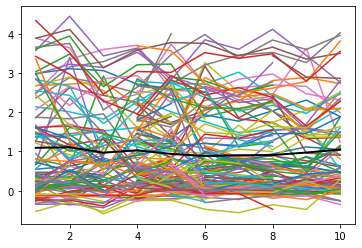

In [685]:
plt.plot(mouse_stage_respones_pt['AS20'][:,:,3].T);
plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][:,:,3], axis=0), color='black', linewidth=2);

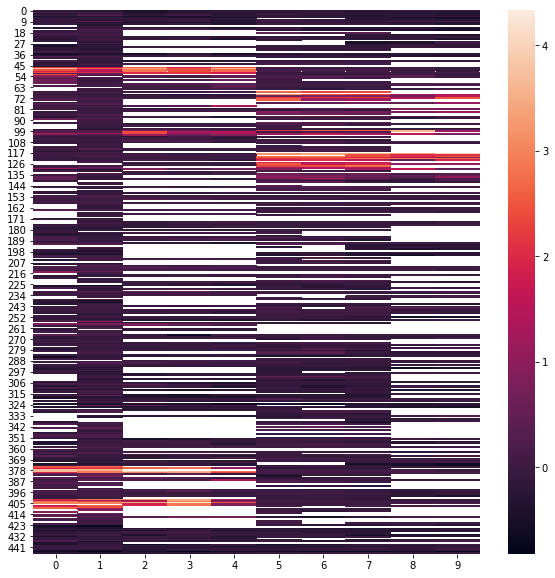

In [636]:
plt.figure(figsize=(10,10))
sns.heatmap(test2)

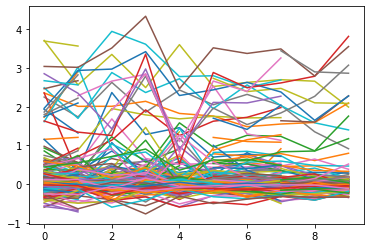

In [628]:
plt.plot(test.T); # WHY 10 STAGES?

# phase stability
- define F1/F0 ratio for cells with stimulus responses
- for cells with a high degree of F1/F0 (2 Hz temporal frequency tracking from the stimulus), are they phase locked across time?
    - show individual trials for one stage and mean (panel one), pick 3 example cells?
    - show all stages and mean for same cell (panel 2) 
    - show summary of phase stability --> y = A sin(B(x + C)) + D; C is phase shift if you fit with a sin,
    - np.correlate() for cross correlation 

In [525]:
from scipy import optimize

def test_func(x, a, b, c, d, e):
    return a * np.sin(b * (x + c)) + d*x + e

In [588]:
(np.arange(20, 46, 1) - 15.5)/15.5

array([0.29032258, 0.35483871, 0.41935484, 0.48387097, 0.5483871 ,
       0.61290323, 0.67741935, 0.74193548, 0.80645161, 0.87096774,
       0.93548387, 1.        , 1.06451613, 1.12903226, 1.19354839,
       1.25806452, 1.32258065, 1.38709677, 1.4516129 , 1.51612903,
       1.58064516, 1.64516129, 1.70967742, 1.77419355, 1.83870968,
       1.90322581])

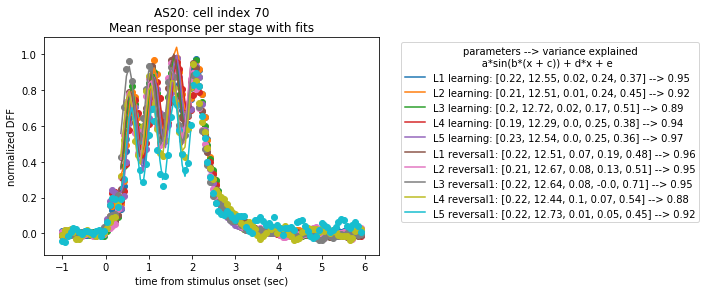

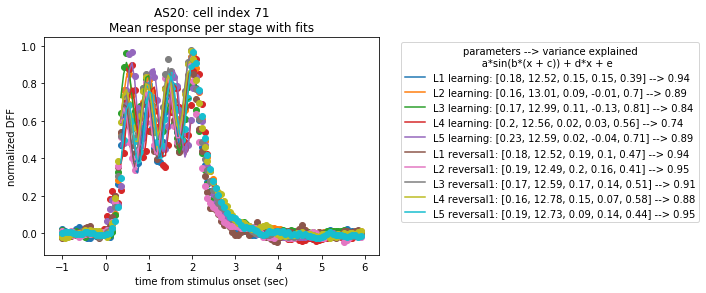

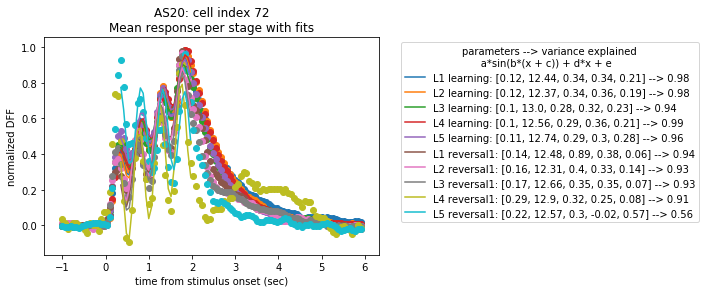

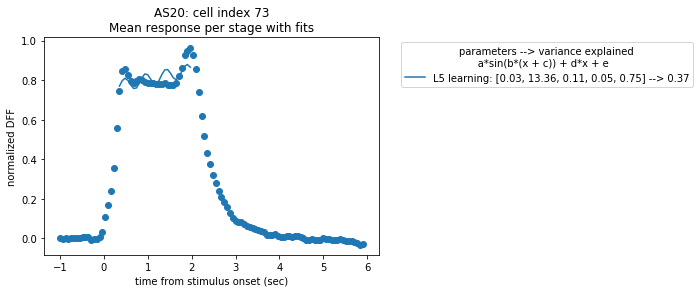

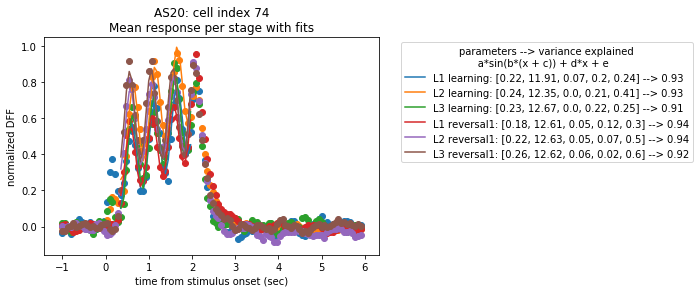

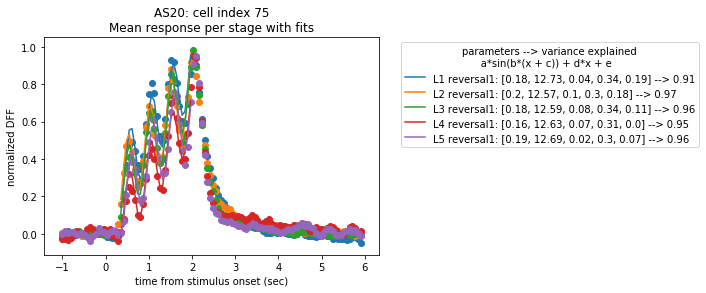

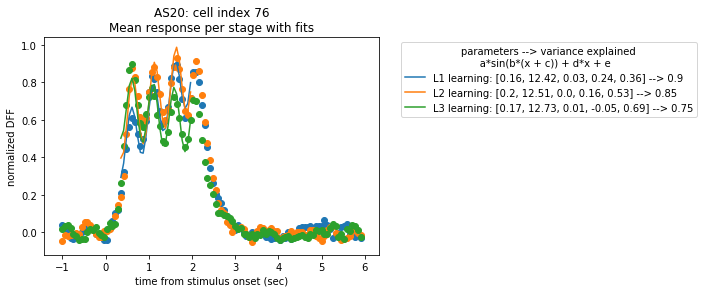

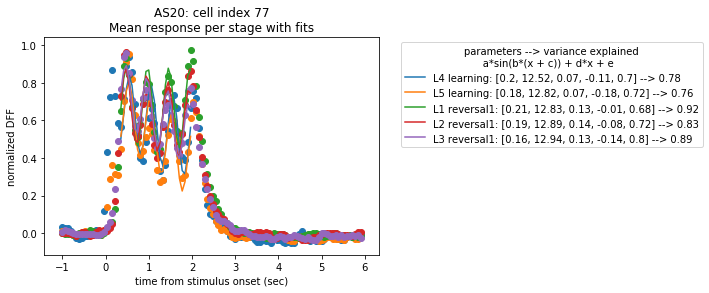

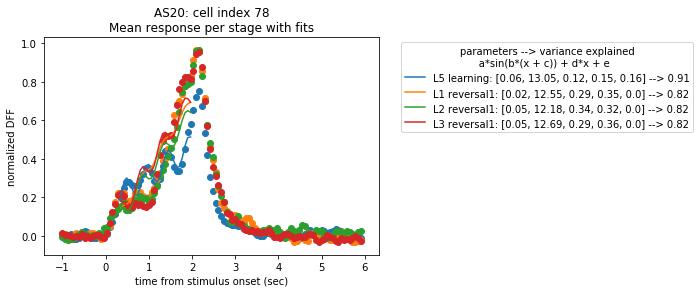

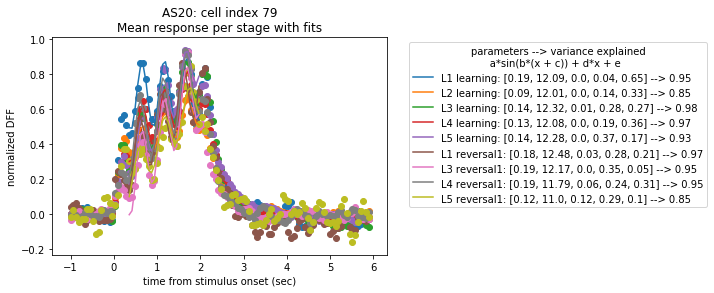

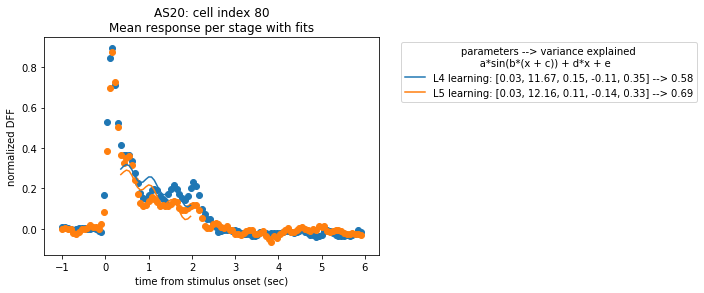

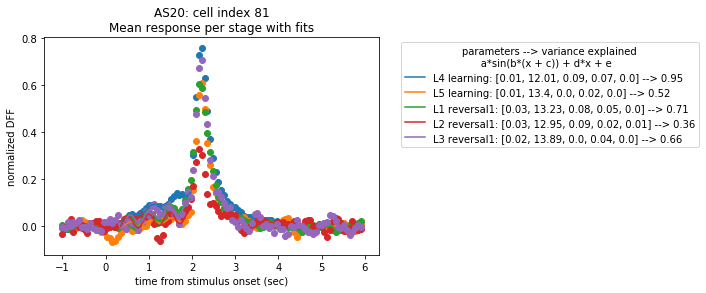

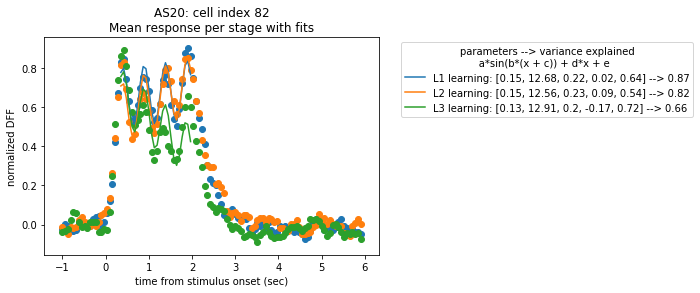

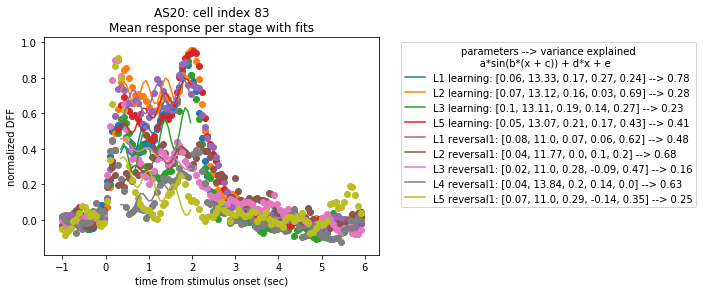

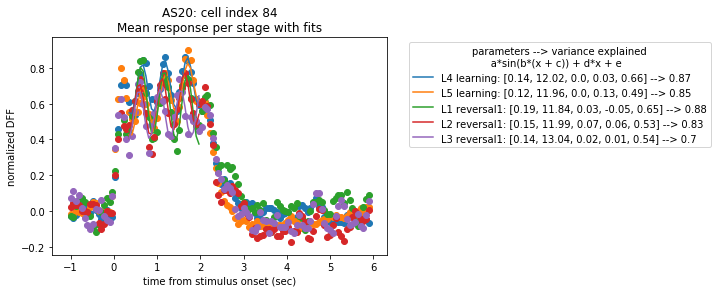

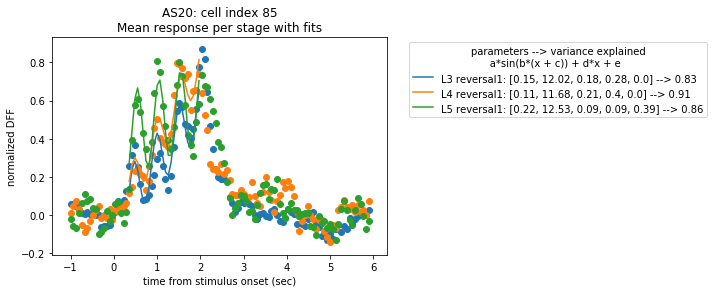

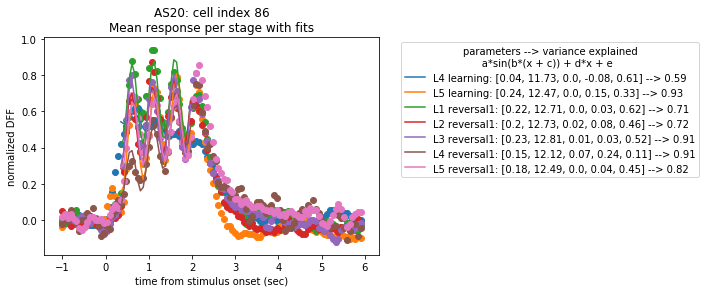

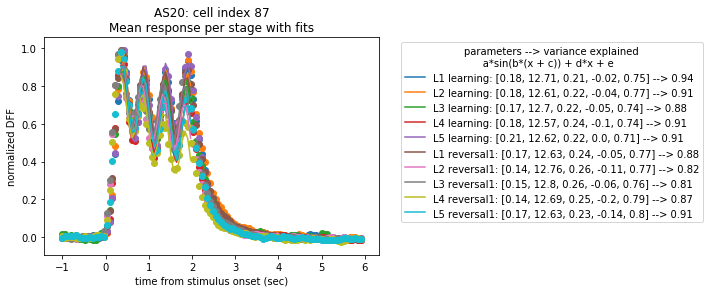

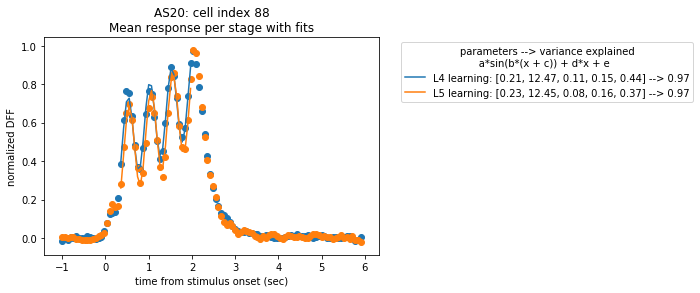

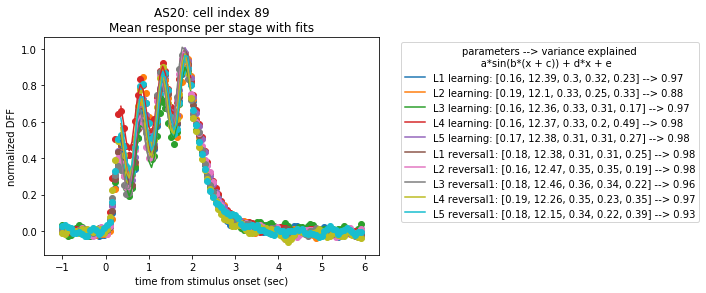

In [606]:
## testing curve fitting a sinusoid with an offset (C = phase offset)
# plt.figure(figsize=(6, 4))
for i in range(70, 90):
    plt.figure(figsize=(6, 4))
    for s in xorder:
        pref_chunk = mouse_stage_respones[mouse][s][i,21:47,3]
        if np.isnan(pref_chunk).any():
                continue
        x_data = (np.arange(21, 47, 1) - 15.5)/15.5
        params, params_covariance = optimize.curve_fit(test_func, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1],
                                                   bounds=((0.01, 11, 0,  -1, 0), (0.3, 14, 1, 1, 1)))
    # print(params)

        varex = 1 - np.nanvar(pref_chunk - test_func(x_data, params[0], params[1], params[2], params[3], params[4]))/np.nanvar(pref_chunk)
    #     plt.scatter(x_data, pref_chunk)
    #     x_data2 = np.arange(15, 46, 1)/15.5
#         plt.figure(figsize=(6, 4))
        plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4]),
             label=f'{s}: {[round(s,2) for s in params]} --> {round(varex, 2)}')
        full_x = (np.arange(0, 108, 1) - 15.5)/15.5
        plt.scatter(full_x, mouse_stage_respones[mouse][s][i,:,3])

    plt.legend(title='parameters --> variance explained\n' +
    '      a*sin(b*(x + c)) + d*x + e', loc='best', bbox_to_anchor=(1.05, 1))
    plt.title(f'{mouse}: cell index {i}\nMean response per stage with fits')
    plt.xlabel('time from stimulus onset (sec)')
    plt.ylabel('normalized DFF')
    
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_cellsinfits_{mouse}_celln{i}.png', bbox_inches='tight')
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_cellsinfits_{mouse}_celln{i}.pdf', bbox_inches='tight')
# plt.xlim([0, 2])

# plt.show()

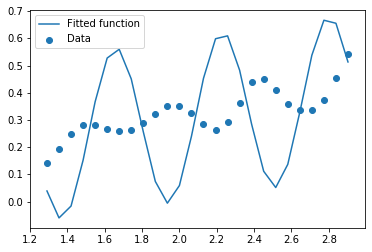

In [564]:

plt.scatter(x_data, pref_chunk, label='Data')
plt.plot(x_data, test_func(x_data, 0.3, 11, 0.2, 0.1, 0.1),
         label='Fitted function')

plt.legend(loc='best') # bounds=((0.01, 0.3), (11, 14), (0, 1), (-1, 1), (0, 1))

## use cross correlation to check phase lag for hi F1/F0-like cells

In [510]:
# test using cross-correlation to check phase lag
from scipy.signal import correlate

pref_chunk = mouse_stage_respones[mouse]['L5 learning'][79,20:46,3]
pref_chunk2 = mouse_stage_respones[mouse]['L1 reversal1'][79,20:46,3]
xcorr_vec = np.correlate(pref_chunk, pref_chunk2, 'full')
phase_lag_frames = np.argmax(xcorr_vec) - np.ceil(len(xcorr_vec)/2)
phase_lag_ms = phase_lag_frames/15.5 * 1000
phase_lag_ms_abs = np.abs(phase_lag_ms)

In [519]:
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = []
    x_data = np.arange(20, 46, 1)/15.5  # in seconds
    for cell_n in range(mouse_stage_respones[mouse]['L0 naive'].shape[0]):
        cell_mat = np.zeros((len(xorder), len(xorder)))
        cell_mat[:] = np.nan
        for c, s in enumerate(xorder):
            pref_chunk = mouse_stage_respones[mouse][s][cell_n,20:46,3]
            if np.isnan(pref_chunk).all():
                continue
            for c2, s2 in enumerate(xorder):
                pref_chunk2 = mouse_stage_respones[mouse][s2][cell_n,20:46,3]
                if np.isnan(pref_chunk2).all():
                    continue
                
                # calculate offset in ms from peak of cross-correlation (absolute value)
                xcorr_vec = np.correlate(pref_chunk, pref_chunk2, 'full')
                phase_lag_frames = np.argmax(xcorr_vec) - np.ceil(len(xcorr_vec)/2)
                phase_lag_ms = phase_lag_frames/15.5 * 1000
                phase_lag_ms_abs = np.abs(phase_lag_ms)
                
                cell_mat[c, c2] = phase_lag_ms_abs
                
        np.fill_diagonal(cell_mat, np.nan)

        break
    break

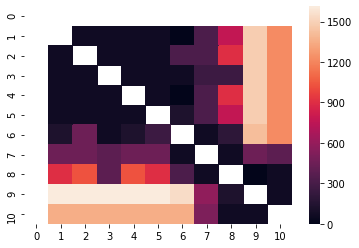

In [520]:
sns.heatmap(cell_mat)

# phase stability across cues/cue-types
- same as above, but use np.correlate to show phase stability for cells driven to different cues

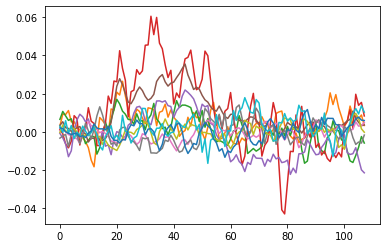

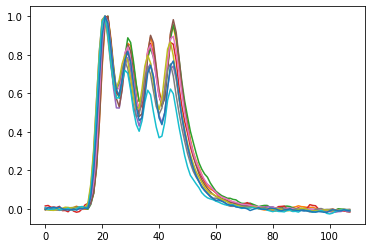

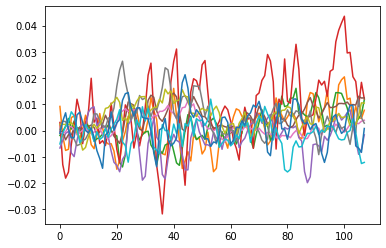

In [405]:
# phase_test = np.hstack(stage_list)

cell = 87
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = []
    plt.figure()
    for s in xorder:
#         stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        plt.plot(mouse_stage_respones[mouse][s][cell,:,0])
    
    plt.figure()
    for s in xorder:
#         stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        plt.plot(mouse_stage_respones[mouse][s][cell,:,1])
    
    plt.figure()
    for s in xorder:
#         stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        plt.plot(mouse_stage_respones[mouse][s][cell,:,2])
    
    break

# correlate cells responses with themselves (across time) vs with other cells (same time)
- this is a partial argument against behavioral/motor confounds
- we may need to flag cells that come online or go offline across reversal (exclude online/offline cells)
    - this could also be done by removing cells whose trial factors are too low for that stage of learning
- could also just focus on learning for now

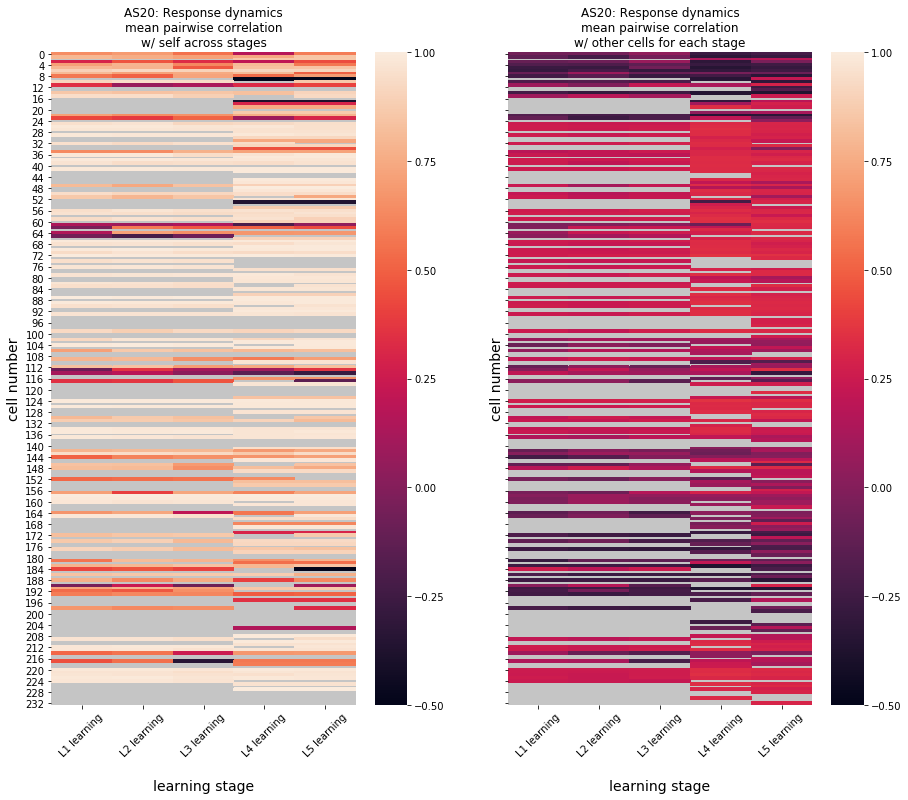

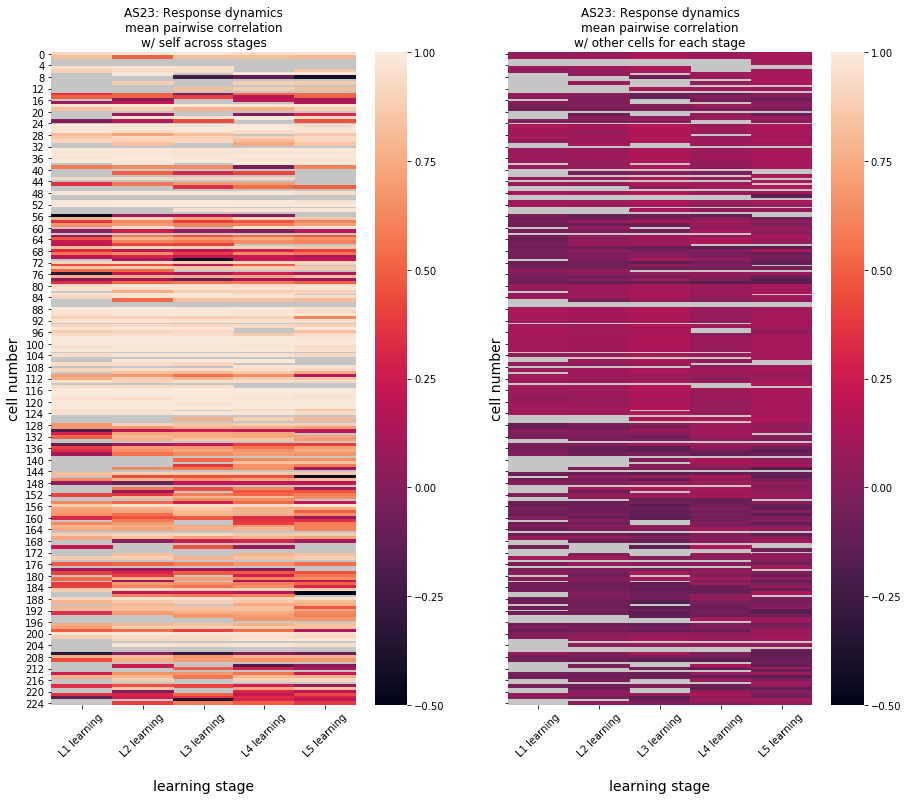

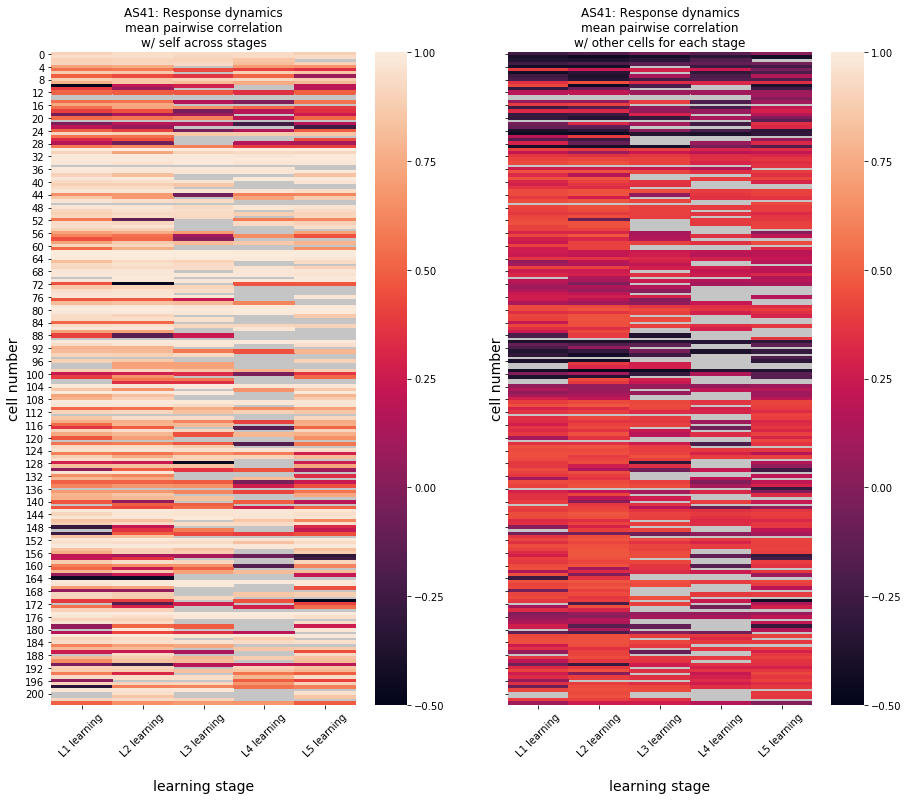

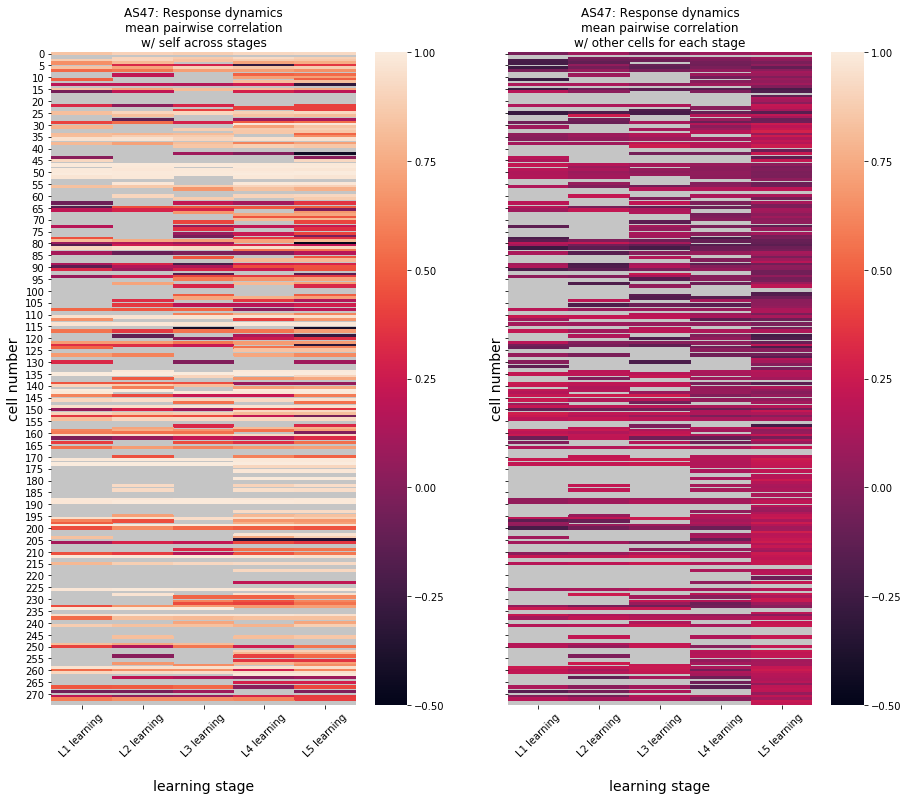

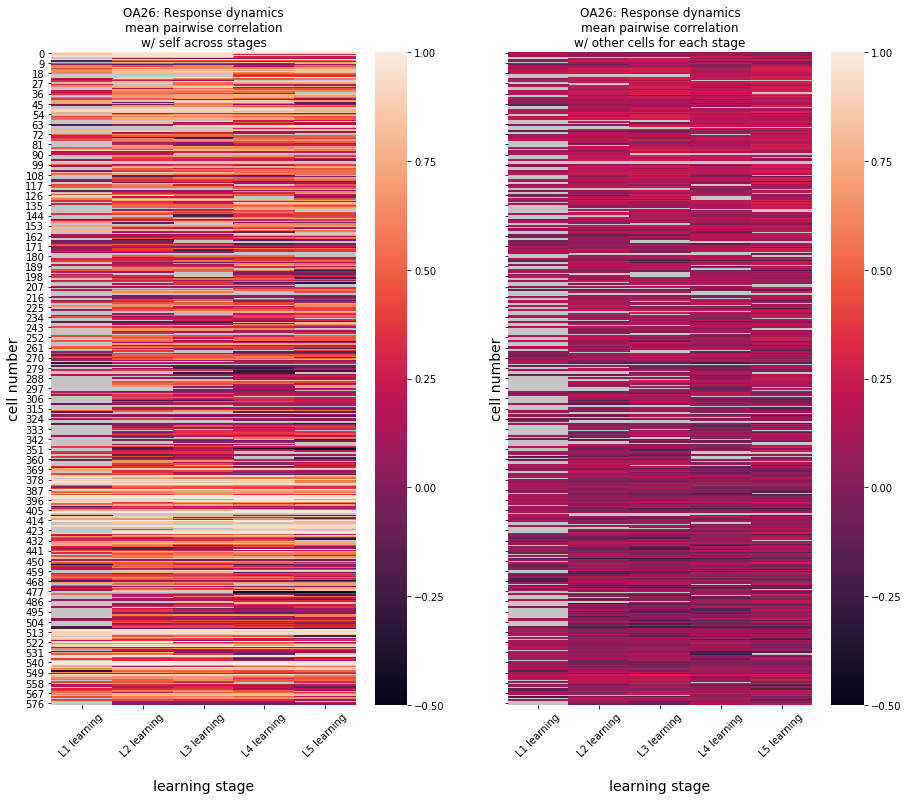

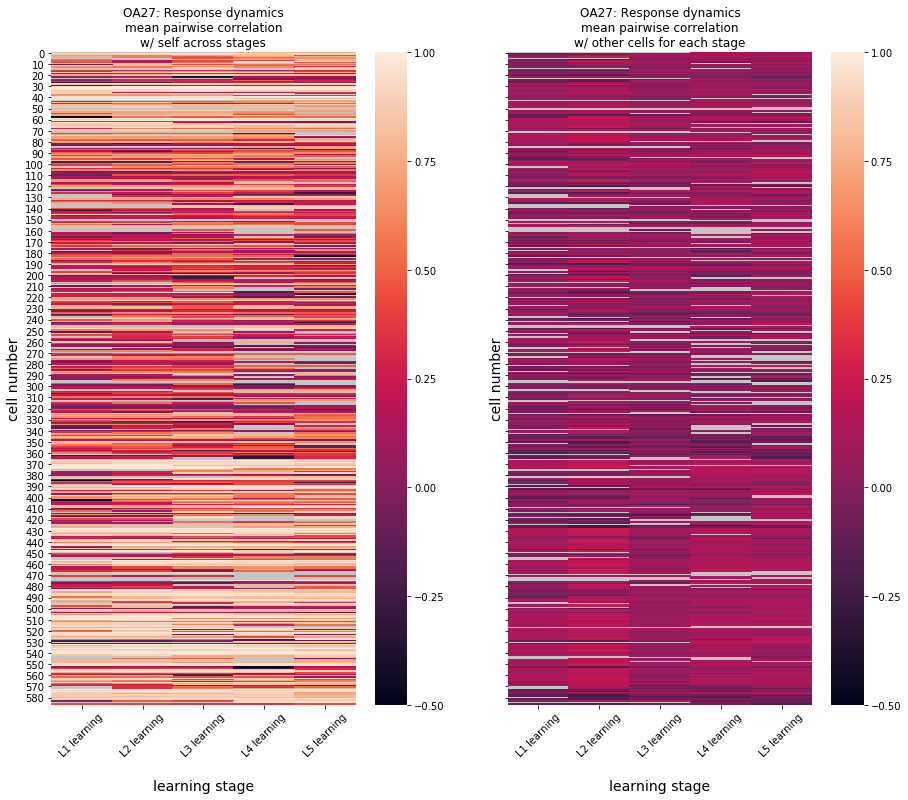

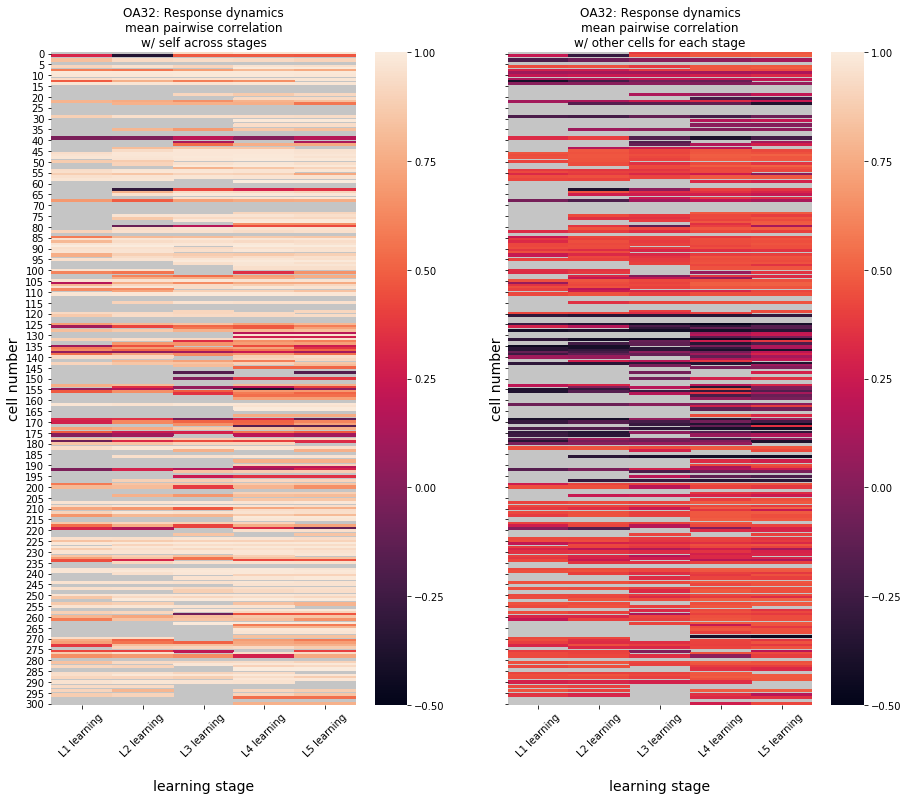

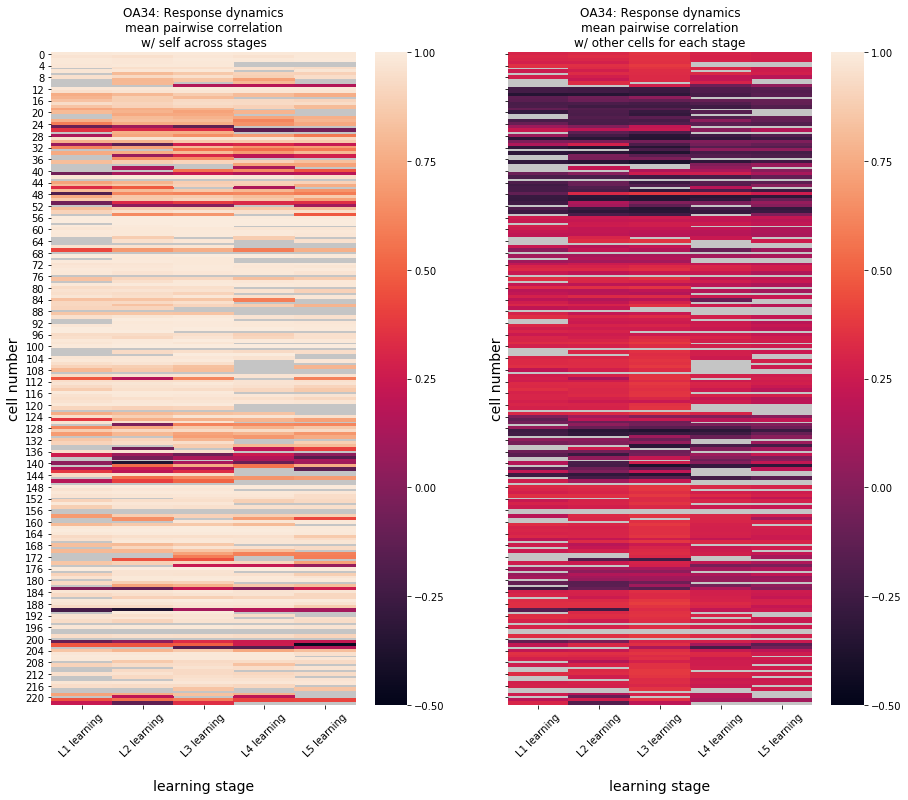

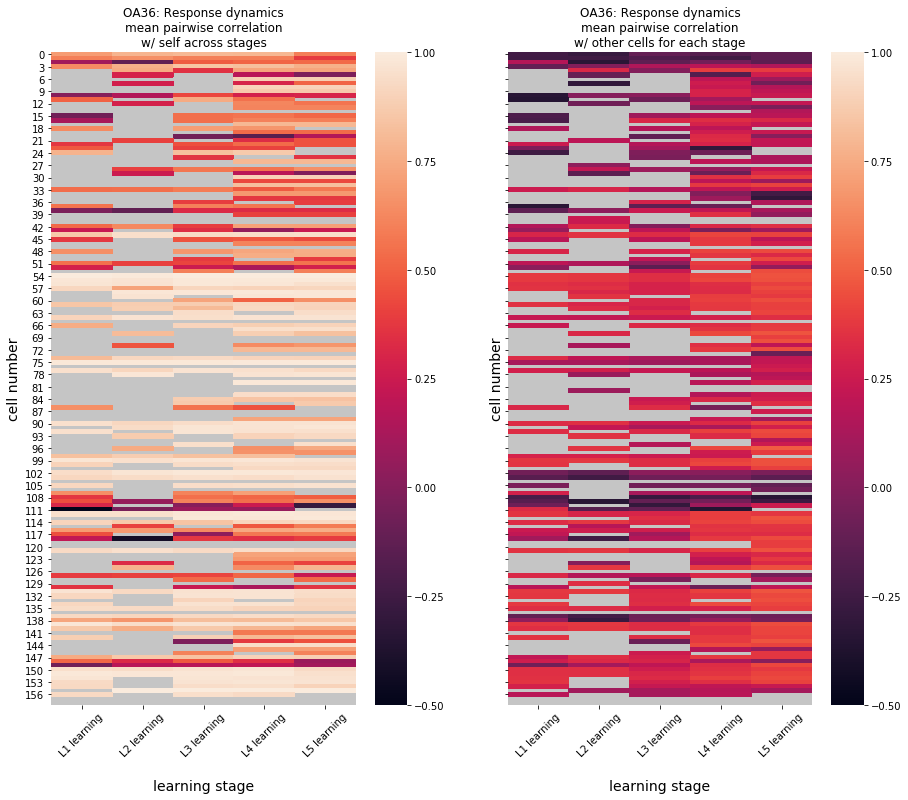

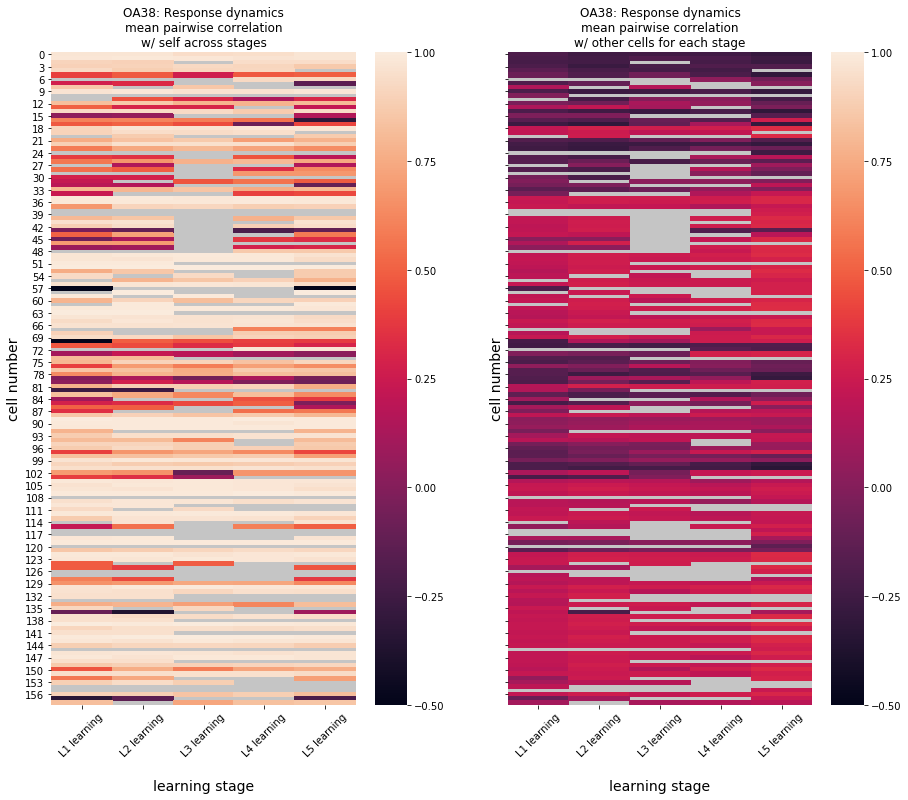

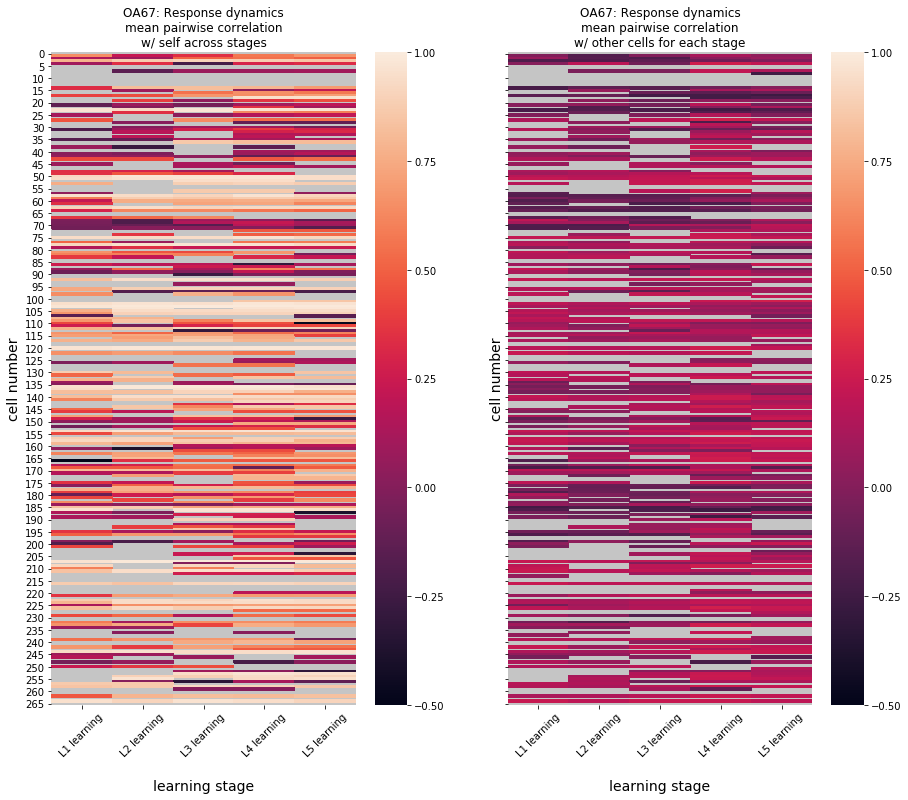

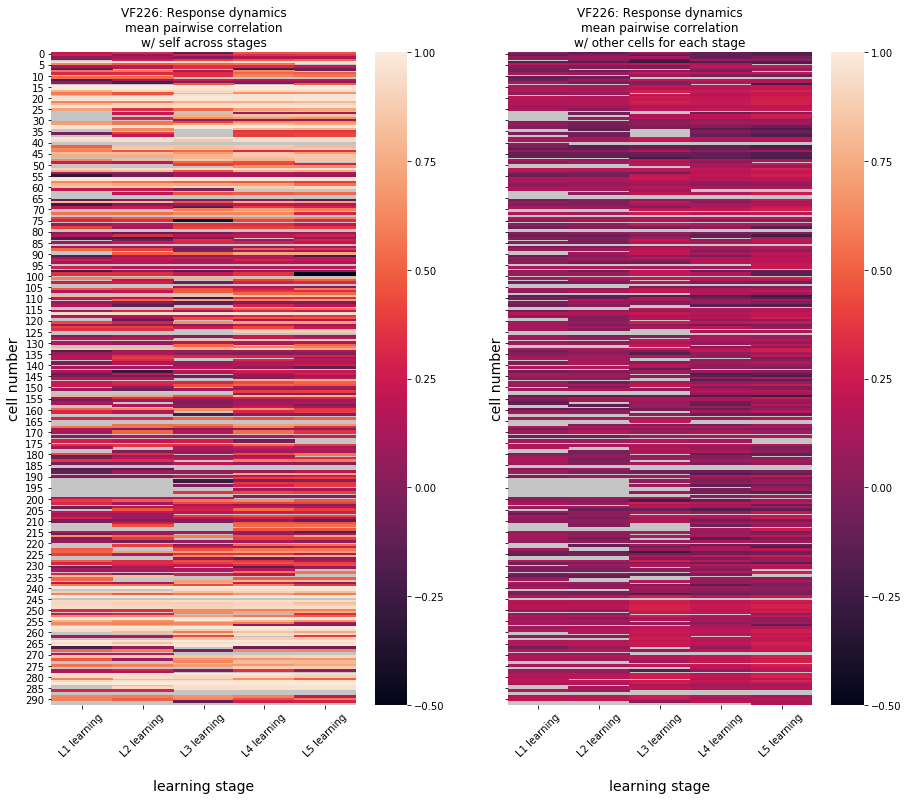

In [274]:
# two heatmaps (for every cell/stage)
#     1. mean correlation all pairwise for same cell compared to other stages
#     2. mean correlation all pairwise for cell compared to other cells same stage...

stages_to_correlate = ['L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning']

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]

    
    # heatmap 1 average pairwise corr across stages, same cell
    corr1_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr1_avgs[:] = np.nan
    for cell_n in range(mouse_stage_respones[mouse][s].shape[0]):
        
        # build a timepoints x stage matrix for each cell
        corr = np.zeros((mouse_stage_respones[mouse][s].shape[1], len(stages_to_correlate)))
        for c, s in enumerate(stages_to_correlate):
            corr[:, c] = mouse_stage_respones[mouse][s][cell_n,:,3]
        
        # account for nan stages
        fill_inds = np.where(~np.isnan(corr[0, :]))[0]
        corrmat = np.corrcoef(corr[:, fill_inds].T)
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_cell_other_stages = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr1_avgs[cell_n, fill_inds] = mean_corr_vec_same_cell_other_stages

        # need to decide how to do this correlation with regard to tuning.
        # point is that cells dynamics are the same between days of same cell rather than between cells 
        #    but should I then only focus on cells with the same tuning? 
            
    # heatmap 2 across cells, same stage
    corr2_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr2_avgs[:] = np.nan
    for c, s in enumerate(stages_to_correlate):
        
        # build a timepoints x stage matrix for each cell
        corr = mouse_stage_respones[mouse][s][:,:,3]
        
        # account for nan stages
        cell_inds = np.where(~np.isnan(corr[:, 0]))[0]
        corrmat = np.corrcoef(corr[cell_inds, :])
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_stage_other_cells = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr2_avgs[cell_inds, c] = mean_corr_vec_same_stage_other_cells
    
    fig, ax = plt.subplots(1,2, figsize=(15,12), sharey=True)
    g = sns.heatmap(corr1_avgs, ax=ax[0], vmax=1, vmin=-0.5)
    g.set_facecolor('#c5c5c5')
    h = sns.heatmap(corr2_avgs, ax=ax[1], vmax=1, vmin=-0.5)
    h.set_facecolor('#c5c5c5')

    ax[0].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ self across stages')
    ax[1].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ other cells for each stage')

    for axi in ax:
        stim_starts = np.arange(len(stages_to_correlate))
        stim_labels = stages_to_correlate
#         axi.set_xticks(stim_starts)
        axi.set_xticklabels(stim_labels, rotation=45)
        axi.set_ylabel('cell number', size=14)
        axi.set_xlabel('\nlearning stage', size=14)
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_corr_heatmap_{mouse}.png', bbox_inches='tight')
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_corr_heatmap_{mouse}.pdf', bbox_inches='tight')

## again as a megaheatmap with the traces

In [ ]:
# two heatmaps (for every cell/stage)
#     1. mean correlation all pairwise for same cell compared to other stages
#     2. mean correlation all pairwise for cell compared to other cells same stage...

stages_to_correlate = ['L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning']

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]

    
    # heatmap 1 average pairwise corr across stages, same cell
    corr1_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr1_avgs[:] = np.nan
    for cell_n in range(mouse_stage_respones[mouse][s].shape[0]):
        
        # build a timepoints x stage matrix for each cell
        corr = np.zeros((mouse_stage_respones[mouse][s].shape[1], len(stages_to_correlate)))
        for c, s in enumerate(stages_to_correlate):
            corr[:, c] = mouse_stage_respones[mouse][s][cell_n,:,3]
        
        # account for nan stages
        fill_inds = np.where(~np.isnan(corr[0, :]))[0]
        corrmat = np.corrcoef(corr[:, fill_inds].T)
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_cell_other_stages = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr1_avgs[cell_n, fill_inds] = mean_corr_vec_same_cell_other_stages

        # need to decide how to do this correlation with regard to tuning.
        # point is that cells dynamics are the same between days of same cell rather than between cells 
        #    but should I then only focus on cells with the same tuning? 
            
    # heatmap 2 across cells, same stage
    corr2_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr2_avgs[:] = np.nan
    for c, s in enumerate(stages_to_correlate):
        
        # build a timepoints x stage matrix for each cell
        corr = mouse_stage_respones[mouse][s][:,:,3]
        
        # account for nan stages
        cell_inds = np.where(~np.isnan(corr[:, 0]))[0]
        corrmat = np.corrcoef(corr[cell_inds, :])
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_stage_other_cells = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr2_avgs[cell_inds, c] = mean_corr_vec_same_stage_other_cells
    
    
    # PLOTTING +_+_+_+_+__++_+_+_+_+__+_++_++_
    
    fig, ax = plt.subplots(1,3, figsize=(20,12), sharey=True)

    
    stage_list = [] 
    for s in xorder:
        stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    g = sns.heatmap(np.hstack(stage_list), vmin=-1, ax=ax[0], cmap=cmap)
    g.set_facecolor('#c5c5c5')
    ax[0].set_title(f'{mouse}: preferred tuning responses, 11 sequential stages of learning\n', size=16)
    stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
    stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
    ax[0].set_xticks(stim_starts)
    ax[0].set_xticklabels(stim_labels, rotation=45)
    ax[0].set_ylabel('cell number', size=14)
    ax[0].set_xlabel('\ntime from stimulus onset (sec)', size=14)
    
    
    g = sns.heatmap(corr1_avgs, ax=ax[1], vmax=1, vmin=-0.5)
    g.set_facecolor('#c5c5c5')
    h = sns.heatmap(corr2_avgs, ax=ax[2], vmax=1, vmin=-0.5)
    h.set_facecolor('#c5c5c5')

    ax[1].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ self across stages')
    ax[2].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ other cells for each stage')

    for axi in ax[1:]:
        stim_starts = np.arange(len(stages_to_correlate))
        stim_labels = stages_to_correlate
#         axi.set_xticks(stim_starts)
        axi.set_xticklabels(stim_labels, rotation=45)
        axi.set_ylabel('cell number', size=14)
        axi.set_xlabel('\nlearning stage', size=14)
        
    break
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/tuning_and_corr_heatmap_{mouse}.png', bbox_inches='tight')
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/tuning_and_corr_heatmap_{mouse}.pdf', bbox_inches='tight')

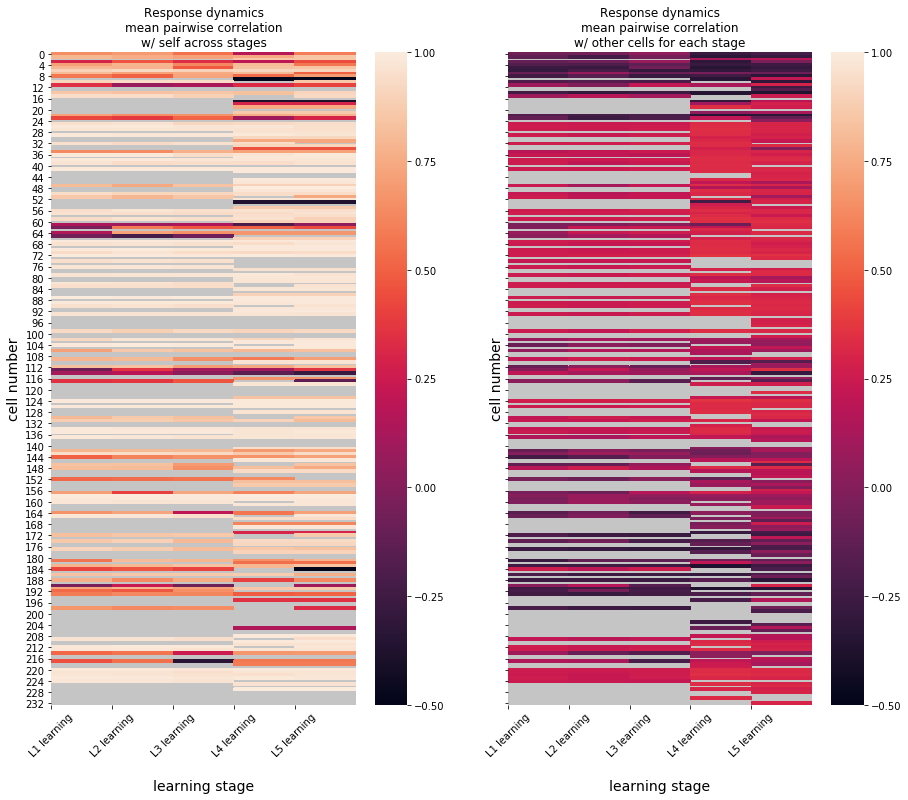

In [272]:
fig, ax = plt.subplots(1,2, figsize=(15,12), sharey=True)
g = sns.heatmap(corr1_avgs, ax=ax[0], vmax=1, vmin=-0.5)
g.set_facecolor('#c5c5c5')
h = sns.heatmap(corr2_avgs, ax=ax[1], vmax=1, vmin=-0.5)
h.set_facecolor('#c5c5c5')

ax[0].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ self across stages')
ax[1].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ other cells for each stage')

for axi in ax:
    stim_starts = np.arange(len(stages_to_correlate))
    stim_labels = stages_to_correlate
    axi.set_xticks(stim_starts)
    axi.set_xticklabels(stim_labels, rotation=45)
    axi.set_ylabel('cell number', size=14)
    axi.set_xlabel('\nlearning stage', size=14)